In [289]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.path.isfile('/Users/rohith kadivendi/Desktop/diabetes.csv')
from subprocess import check_output


In [290]:
data = pd.read_csv('C:/Users/rohith kadivendi/Desktop/diabetes.csv')
data.sample(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
632,2,111,60,0,0,26.2,0.343,23,0
554,1,84,64,23,115,36.9,0.471,28,0
549,4,189,110,31,0,28.5,0.680,37,0
290,0,78,88,29,40,36.9,0.434,21,0
206,8,196,76,29,280,37.5,0.605,57,1


In [291]:
print(data.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [292]:
df = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.sample(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
566,0.058824,0.497487,0.590164,0.303030,0.021277,0.575261,0.142613,0.000000,0.0
697,0.000000,0.497487,0.000000,0.000000,0.000000,0.372578,0.074722,0.016667,0.0
245,0.529412,0.924623,0.696721,0.151515,0.000000,0.447094,0.484629,0.466667,1.0
240,0.058824,0.457286,0.524590,0.242424,0.000000,0.435171,0.048676,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


In [293]:
train_test_per = 80/100.0
df['train'] = np.random.rand(len(df)) < train_test_per
df.sample(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,train
720,0.235294,0.417085,0.704918,0.191919,0.000000,0.436662,0.102050,0.216667,0.0,True
470,0.058824,0.723618,0.672131,0.404040,0.000000,0.615499,0.225875,0.116667,0.0,True
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0,True
290,0.000000,0.391960,0.721311,0.292929,0.047281,0.549925,0.152007,0.000000,0.0,False
318,0.176471,0.577889,0.540984,0.393939,0.165485,0.567809,0.030743,0.116667,0.0,True


In [294]:
train = df[df.train == 1]
train = train.drop('train', axis=1).sample(frac=1)
train.sample(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
103,0.058824,0.407035,0.590164,0.181818,0.047281,0.396423,0.087532,0.050000,0.0
150,0.058824,0.683417,0.606557,0.505051,0.241135,0.557377,0.137062,0.050000,0.0
740,0.647059,0.603015,0.655738,0.373737,0.177305,0.630402,0.301879,0.450000,1.0
119,0.235294,0.497487,0.622951,0.151515,0.060284,0.345753,0.061913,0.000000,0.0
416,0.058824,0.487437,0.557377,0.212121,0.000000,0.405365,0.434244,0.016667,0.0


In [295]:
test = df[df.train == 0]
test = test.drop('train', axis=1)
test.sample(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
20,0.176471,0.633166,0.721311,0.414141,0.277778,0.585693,0.267293,0.100000,0.0
594,0.352941,0.618090,0.590164,0.454545,0.271868,0.500745,0.279675,0.216667,0.0
86,0.764706,0.532663,0.590164,0.545455,0.000000,0.545455,0.042699,0.400000,0.0
602,0.058824,0.623116,0.606557,0.363636,0.000000,0.414307,0.009394,0.150000,0.0
676,0.529412,0.783920,0.704918,0.000000,0.000000,0.369598,0.064902,0.533333,1.0


In [296]:
X = train.values[:,:8]
X[:5]

array([[0.47058824, 0.52763819, 0.81967213, 0.36363636, 0.        ,
        0.64530551, 0.06874466, 0.4       ],
       [0.17647059, 0.58291457, 0.60655738, 0.15151515, 0.12411348,
        0.39195231, 0.01238258, 0.05      ],
       [0.23529412, 0.59296482, 0.57377049, 0.        , 0.        ,
        0.66318927, 0.35269001, 0.08333333],
       [0.17647059, 0.41708543, 0.47540984, 0.31313131, 0.0212766 ,
        0.51117735, 0.11016225, 0.06666667],
       [0.11764706, 0.43718593, 0.47540984, 0.16161616, 0.06146572,
        0.48733234, 0.03757472, 0.06666667]])

In [297]:
targets = [[0],[1]]
y = np.array([targets[int(x)] for x in train.values[:,8:9]])
y[:5]

array([[1],
       [0],
       [0],
       [0],
       [0]])

In [298]:
num_inputs = len(X[0])
hidden_layer_neurons = 7
np.random.seed(3)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.10159581,  0.41629565, -0.41819052,  0.02165521,  0.78589391,
         0.79258618, -0.74882938],
       [-0.58551424, -0.89706559, -0.11838031, -0.94024758, -0.08633355,
         0.2982881 , -0.44302543],
       [ 0.3525098 ,  0.18172563, -0.95203624,  0.11770818, -0.48149511,
        -0.16979761, -0.43294984],
       [ 0.38627584, -0.11909256, -0.68626452,  0.08929804,  0.56062953,
        -0.38727294, -0.55608423],
       [-0.22405748,  0.8727673 ,  0.95199084,  0.34476735,  0.80566822,
         0.69150174, -0.24401192],
       [-0.81556598,  0.30682181,  0.11568152, -0.27687047, -0.54989099,
        -0.18696017, -0.0621195 ],
       [-0.46152884, -0.41641445, -0.0846272 ,  0.72106783,  0.17250581,
        -0.43302428, -0.44404499],
       [-0.09075585, -0.58917931, -0.59724258,  0.02807012, -0.82554126,
        -0.03282894, -0.27564758]])

In [299]:
num_hid2 = 5

w2 = 2*np.random.random((hidden_layer_neurons, num_hid2)) - 1
w2

array([[ 0.41537324,  0.49349245,  0.38218584,  0.37836083, -0.25279975],
       [ 0.33626961, -0.32030267,  0.14558774, -0.34838568, -0.1097099 ],
       [-0.87694214, -0.51464916,  0.94320521, -0.53883159,  0.38295502],
       [ 0.30095372,  0.44787828, -0.04982278,  0.19332755, -0.86606115],
       [-0.85487572, -0.60204795, -0.69627801, -0.79979131, -0.74141227],
       [ 0.10655546, -0.62437035,  0.90420249,  0.36322356,  0.08203935],
       [ 0.4143612 , -0.47222666,  0.85345137,  0.67838612,  0.452639  ]])

In [300]:
num_hid3=3

w3=2*np.random.random((num_hid2, num_hid3)) - 1
w3

array([[-0.03952009,  0.68420637,  0.48950465],
       [ 0.32065181,  0.82795053,  0.26733113],
       [-0.26811883,  0.10568915, -0.60723885],
       [-0.61585541,  0.45133925,  0.56987341],
       [ 0.94419673,  0.70194283,  0.08718865]])

In [301]:
num_hid4=2

w4=2*np.random.random((num_hid3,num_hid4))-1
w4  

array([[-0.82041826, -0.02225351],
       [ 0.8558727 ,  0.5752364 ],
       [-0.02981155, -0.08944128]])

In [302]:
num_outputs = len(y[0])

w5 = 2*np.random.random((num_hid4, num_outputs)) - 1
w5

array([[-0.56402846],
       [-0.64557324]])

Error: 0.2516924748590746


Text(0.5,0,'iterations')

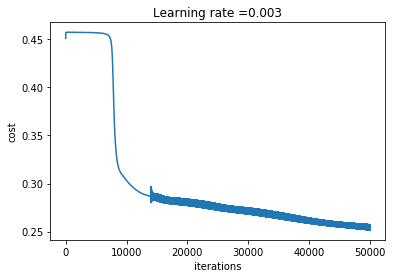

In [303]:
learning_rate = 0.003 # slowly update the network
errors=[]
for epoch in range(50000):
    l1 = 1/(1 + np.exp(-(np.dot(X, w1)))) # sigmoid function
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
    l3 = 1/(1 + np.exp(-(np.dot(l2, w3))))
    l4 = 1/(1 + np.exp(-(np.dot(l3, w4))))
    l5 = 1/(1 + np.exp(-(np.dot(l4, w5))))
    er = (abs(y - l5)).mean()
    errors.append(er)
    
    l5_delta = (y-l5)*(l5*(1-l5))
    l4_delta = l5_delta.dot(w5.T)*(l4*(1-l4))
    l3_delta = l4_delta.dot(w4.T)*(l3*(1-l3))
    l2_delta = l3_delta.dot(w3.T)*(l2 * (1-l2))
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    
    w5 += l4.T.dot(l5_delta) * learning_rate
    w4 += l3.T.dot(l4_delta) * learning_rate
    w3 += l2.T.dot(l3_delta) * learning_rate
    w2 += l1.T.dot(l2_delta) * learning_rate
    w1 += X.T.dot(l1_delta) * learning_rate
print('Error:', er)
plt.plot(errors)
plt.title("Learning rate =" + str(learning_rate))
plt.ylabel('cost')
plt.xlabel('iterations')

In [304]:
l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
l3 = 1/(1+np.exp(-(np.dot(l2,w3))))
l4 = 1/(1+np.exp(-(np.dot(l3,w4))))
l5 = 1/(1+np.exp(-(np.dot(l4,w5))))

l5=(l5>=0.5)
yptr=l5
yptrreal=y

In [305]:
X = test.values[:,:8]
y = np.array([targets[int(x)] for x in test.values[:,8:9]])
l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
l3 = 1/(1+np.exp(-(np.dot(l2,w3))))
l4 = 1/(1+np.exp(-(np.dot(l3,w4))))
l5 = 1/(1+np.exp(-(np.dot(l4,w5))))

l5=(l5>=0.5)

In [306]:
yp=l5
print("train accuracy: {} %".format(100 - np.mean(np.abs(yptr - yptrreal)) * 100))
print("test accuracy: {} %".format(100 - np.mean(np.abs(yp - y)) * 100))

train accuracy: 82.36220472440945 %
test accuracy: 81.203007518797 %
